# Cincinnati Traffic

## Topic
*What problem are you (or your stakeholder) trying to address?* 
THe issue that I will be focusing on is that of Cincinnati roads. It would seem that most says this city has a new unique arangement of road closures due to traffic collisions. If Cincinnati we looking to improve their road conditions and safety, it would be important to know where the majority of traffic collisions occur. It would also be important to know the severtiy of the accidents in these locations to know where the more serious problems are located. This project could even determine which areas are unsafe to travel depending on weather conditions. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*

Where in Cincinnati are the majority of fatal accidents, and what commonalities do the collisions share?

## What would an answer look like?
*What is your hypothesized answer to your question?*

I predict that the majority of wrecks will be in high trafficed areas of high speeds. Sharp bends will also have an effect on the situations. It will also be important to note the variation between weather conditions.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
*How will you use this data to answer your project question?*



 To prepare for this project, it will be necessary to collect data from reliable resources. All of the City of Cincinnati's information is collected and published online for all to access. The information collected will provide a map of the the area with ranking of dangerous roads to safe. 

 Data Sources:

 https://data.cincinnati-oh.gov/resource/rvmt-pkmq.json

 https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq


In [80]:
# Start your code here

In [81]:
import sys
assert sys.version_info >= (3, 10)

import numpy as np
import pandas as pd
import os
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")



In [82]:
traffic=pd.read_csv("datasets/traffic_crash_reports.csv")

In [83]:
traffic.describe()

,LATITUDE_X,LONGITUDE_X,AGE
count,105183.000000,105183.000000,105183.000000
mean,39.139677,-84.513909,37.658139
std,0.031165,0.048852,16.423981
min,39.054609,-84.756898,0.000000
25%,39.114384,-84.542479,24.000000
50%,39.135026,-84.513206,34.000000
75%,39.161079,-84.486142,50.000000
max,39.308208,-84.251150,123.000000


In [84]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105183 entries, 0 to 105182
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   LATITUDE_X                      105183 non-null  float64
 1   LONGITUDE_X                     105183 non-null  float64
 2   AGE                             105183 non-null  int64  
 3   COMMUNITY_COUNCIL_NEIGHBORHOOD  103565 non-null  object 
 4   CRASHDATE                       105183 non-null  object 
 5   CRASHLOCATION                   105183 non-null  object 
 6   DAYOFWEEK                       105183 non-null  object 
 7   GENDER                          105183 non-null  object 
 8   INJURIES                        105183 non-null  object 
 9   LIGHTCONDITIONSPRIMARY          105183 non-null  object 
 10  MANNEROFCRASH                   105183 non-null  object 
 11  ROADCONTOUR                     105183 non-null  object 
 12  ROADCLASSDESC   

In [85]:
traffic.isnull().sum()

LATITUDE_X                           0
LONGITUDE_X                          0
AGE                                  0
COMMUNITY_COUNCIL_NEIGHBORHOOD    1618
CRASHDATE                            0
CRASHLOCATION                        0
DAYOFWEEK                            0
GENDER                               0
INJURIES                             0
LIGHTCONDITIONSPRIMARY               0
MANNEROFCRASH                        0
ROADCONTOUR                          0
ROADCLASSDESC                        0
UNITTYPE                             0
TYPEOFPERSON                         0
WEATHER                              0
dtype: int64

In [86]:
trafficCrashSample=traffic.copy(deep=True)
trafficCrashSample.sample(5)

,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONSPRIMARY,MANNEROFCRASH,ROADCONTOUR,ROADCLASSDESC,UNITTYPE,TYPEOFPERSON,WEATHER
18703,39.127323,-84.497683,40,WALNUT HILLS,3/8/2018 7:43,01 - NOT AN INTERSECTION,THU,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,2 - REAR-END,2 - STRAIGHT GRADE,Ramps,03 - MID SIZE,D - DRIVER,6 - SNOW
81815,39.177286,-84.510274,34,WINTON HILLS,9/14/2014 21:49,02 - FOUR-WAY INTERSECTION,SUN,F - FEMALE,1 - NO INJURY / NONE REPORTED,4 - DARK - LIGHTED ROADWAY,"8 - SIDESWIPE, OPPOSITE DIRECTION",2 - STRAIGHT GRADE,Local Streets/Roads,06 - SPORT UTILITY VEHICLE,D - DRIVER,1 - CLEAR
104860,39.103476,-84.532582,39,QUEENSGATE,12/14/2012 10:24,02 - FOUR-WAY INTERSECTION,FRI,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,2 - REAR-END,1 - STRAIGHT LEVEL,Major Arterial Roads,02 - COMPACT,D - DRIVER,1 - CLEAR
73180,39.128158,-84.428785,24,MOUNT LOOKOUT,9/14/2015 7:20,01 - NOT AN INTERSECTION,MON,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,2 - REAR-END,2 - STRAIGHT GRADE,Major Arterial Roads,04 - FULL SIZE,D - DRIVER,1 - CLEAR
77231,39.098521,-84.511493,23,DOWNTOWN,10/26/2014 12:42,01 - NOT AN INTERSECTION,SUN,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,6 - ANGLE,1 - STRAIGHT LEVEL,Interstate Highways,17 - TRACTOR/SEMI-TRAILER,D - DRIVER,1 - CLEAR


In [87]:
list(trafficCrashSample.columns)

['LATITUDE_X',
 'LONGITUDE_X',
 'AGE',
 'COMMUNITY_COUNCIL_NEIGHBORHOOD',
 'CRASHDATE',
 'CRASHLOCATION',
 'DAYOFWEEK',
 'GENDER',
 'INJURIES',
 'LIGHTCONDITIONSPRIMARY',
 'MANNEROFCRASH',
 'ROADCONTOUR',
 'ROADCLASSDESC',
 'UNITTYPE',
 'TYPEOFPERSON',
 'WEATHER']

In [88]:
trafficCrashSample.drop(columns=['ADDRESS_X',
 'LATITUDE_X',
 'LONGITUDE_X',
 'CPD_NEIGHBORHOOD',
 'SNA_NEIGHBORHOOD',
 'LIGHTCONDITIONSPRIMARY',
 'ROADCONDITIONSPRIMARY',
 'ROADCLASSDESC',
 'UNITTYPE'], axis=1, inplace=True)
trafficCrashSample.sample(5)

KeyError: "['ADDRESS_X', 'CPD_NEIGHBORHOOD', 'SNA_NEIGHBORHOOD', 'ROADCONDITIONSPRIMARY'] not found in axis"

In [ ]:
trafficCrashSample['CRASHDATE'].dtypes

dtype('O')

In [ ]:
trafficCrashSample['CRASHDATE'] = pd.to_datetime(trafficCrashSample['CRASHDATE'])

Text(0.5, 1.0, 'Total crashes for each day of the week')

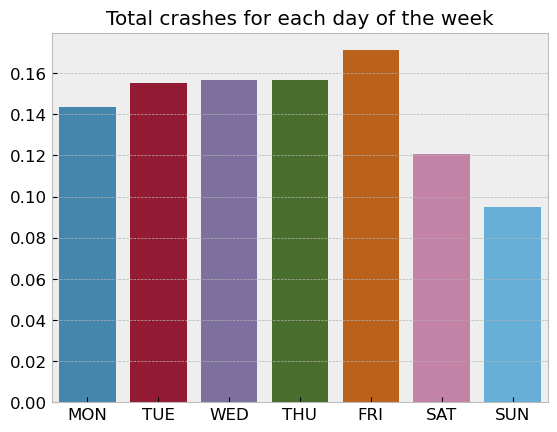

In [ ]:
count = trafficCrashSample['CRASHDATE'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['MON','TUE','WED','THU','FRI','SAT','SUN']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax)
ax.set_title('Total crashes for each day of the week')

In [ ]:
plotdata=pd.DataFrame({"DAYOFWEEK": ['MON','TUE','WED','THU','FRI','SAT','SUN']})
trafficCrashSample['DAYOFWEEK'].plot(kind="bar")

TypeError: no numeric data to plot

In [ ]:
count_1 = trafficCrashSample['WEATHER'].value_counts(normalize=True)
count_2 = trafficCrashSample['GENDER'].value_counts(normalize=True)
count_3 = trafficCrashSample['ROADCONTOUR'].value_counts(normalize=True)
count_4 = trafficCrashSample['INJURIES'].value_counts(normalize=True)

Text(0.5, 1.0, 'Injuries')

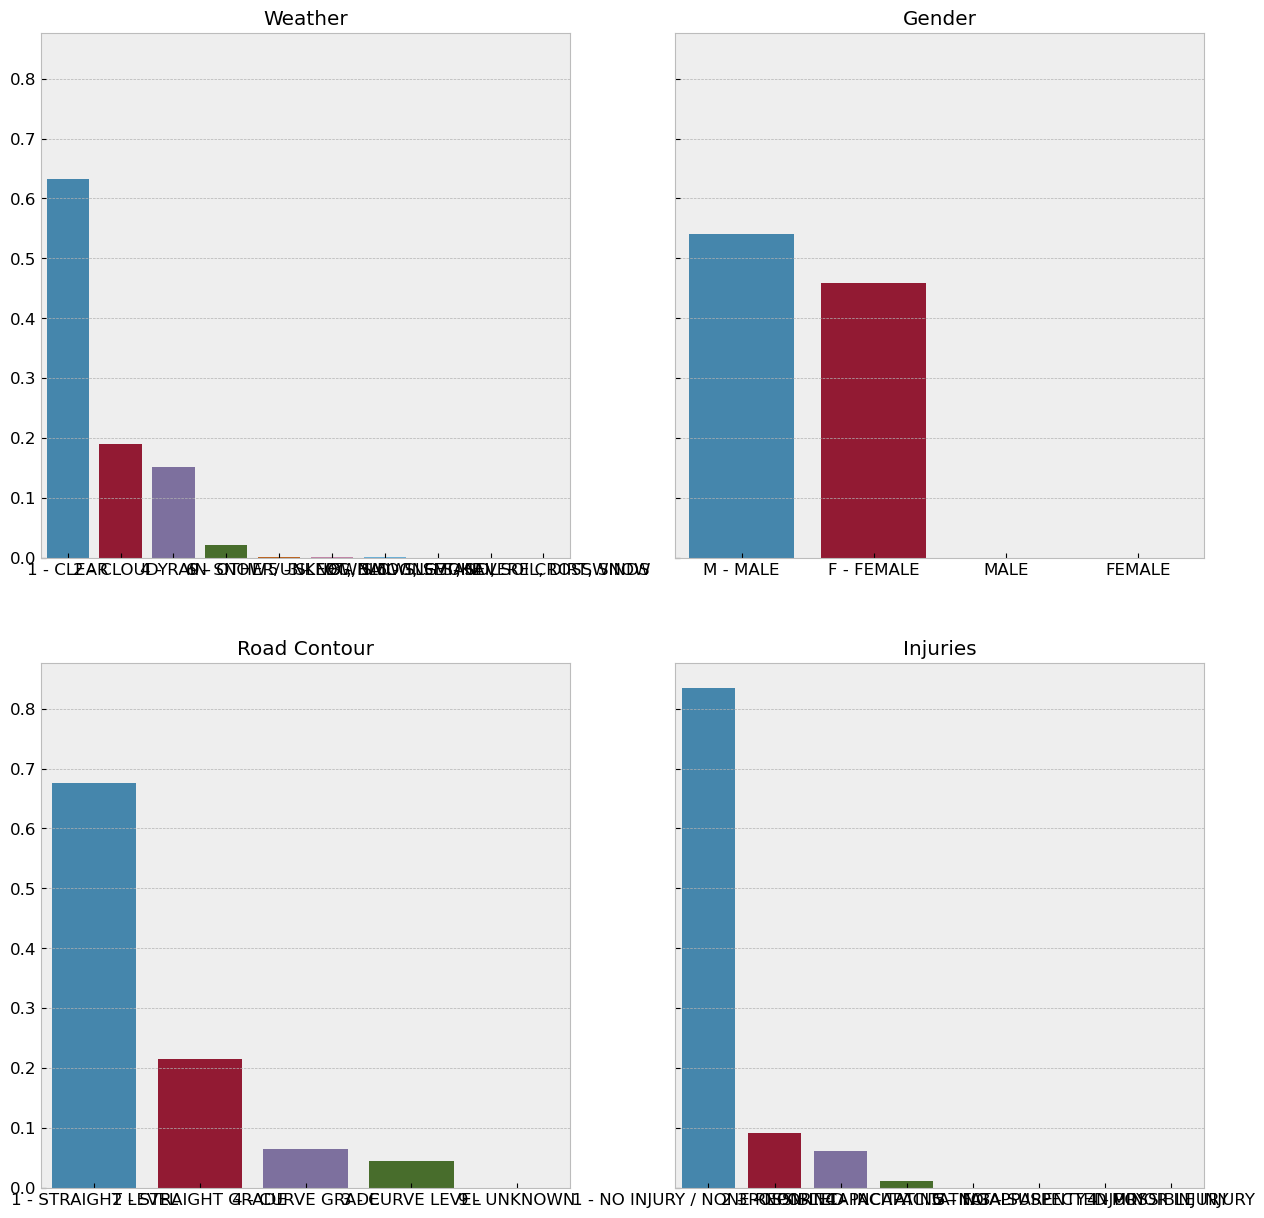

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
sns.barplot(x=count_1.index, y=count_1.values, ax=axes[0,0])
axes[0,0].set_title('Weather')
sns.barplot(x=count_2.index, y=count_2.values, ax=axes[0,1])
axes[0,1].set_title('Gender')
sns.barplot(x=count_3.index, y=count_3.values, ax=axes[1,0])
axes[1,0].set_title('Road Contour')
sns.barplot(x=count_4.index, y=count_4.values, ax=axes[1,1])
axes[1,1].set_title('Injuries')

In [ ]:
# EDA
# Produce statistical summaries of the data.
# Analyze data distributions of the data.
# Analyze the correlations between the data features.
# Identifying data issues.
# identifying data types that need to be converted/transformed
# You'll need to provide a detailed write-up on every item above.

In [ ]:
# Data Visualizations
# Create at least 4 visualizations
# Use at least 2 different visualizations libraries (of your choice)
# You'll need to provide a detailed write-up on the data visualization types selected and the insights it can present.

In [ ]:
# Data Cleaning and Transformations
# Addressing missing values in the dataset
# Addressing duplicate values
# Addressing anomalies and Outliers
# Converting and Transforming Data types
# You'll need to provide a detailed write-up on the cleaning process.

In [ ]:
# Machine Learning Plan
# What types of machine learning will you use in your project?
# What issues do you see in making that happen?
# What challenges will you potentially face?